In [1]:
! pip install split-folders

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
import splitfolders
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

In [3]:
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/11. NN_Classification_Keras

/content/drive/MyDrive/11. NN_Classification_Keras


# Split the folder into train and test and Prepare train and test datasets, Loaders


In [7]:
splitfolders.ratio("Circle_Cross", output="TrainTest",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

Copying files: 2011 files [00:41, 48.81 files/s] 


# Generating Train and Test DataGenerators

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
num_classes = 2
img_shape = (116,116,3)
batch_size = 32

## Creating Training and Testing Dataset

In [14]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/11. NN_Classification_Keras/TrainTest/train',
                                                 target_size = (116,116),
                                                 class_mode='binary',
                                                 shuffle = True,
                                                 batch_size = batch_size)


Found 1607 images belonging to 2 classes.


In [15]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/11. NN_Classification_Keras/TrainTest/val',
                                                 target_size = (116,116),
                                                 class_mode='binary',
                                                 shuffle = False,
                                                 batch_size = batch_size)


Found 403 images belonging to 2 classes.


## Define the model

In [16]:
model = Sequential()
model.add(Flatten(input_shape = [116,116,3]))
model.add(Dense(units = 2048, activation = 'relu'))
model.add(Dense(units = 2048, activation = 'relu'))
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 40368)             0         
                                                                 
 dense (Dense)               (None, 2048)              82675712  
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               3

In [18]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9) ,loss='binary_crossentropy', metrics=['accuracy'])

## Train and Test the model

In [19]:
hist = model.fit(training_set,
                              epochs = 36,
                              validation_data = test_set)

Epoch 1/36
51/51 [==============================] - 8s 79ms/step - loss: 0.6373 - accuracy: 0.6123 - val_loss: 0.4944 - val_accuracy: 0.8114
Epoch 2/36
51/51 [==============================] - 4s 84ms/step - loss: 0.5687 - accuracy: 0.6820 - val_loss: 0.5425 - val_accuracy: 0.5707
Epoch 3/36
51/51 [==============================] - 4s 77ms/step - loss: 0.4053 - accuracy: 0.8046 - val_loss: 1.0349 - val_accuracy: 0.5037
Epoch 4/36
51/51 [==============================] - 4s 81ms/step - loss: 0.3628 - accuracy: 0.8594 - val_loss: 0.2011 - val_accuracy: 0.9082
Epoch 5/36
51/51 [==============================] - 5s 96ms/step - loss: 0.1929 - accuracy: 0.9235 - val_loss: 0.6450 - val_accuracy: 0.7370
Epoch 6/36
51/51 [==============================] - 5s 90ms/step - loss: 0.1715 - accuracy: 0.9328 - val_loss: 0.0877 - val_accuracy: 0.9752
Epoch 7/36
51/51 [==============================] - 3s 67ms/step - loss: 0.1128 - accuracy: 0.9577 - val_loss: 0.0843 - val_accuracy: 0.9677
Epoch 8/36
51

In [20]:
trainAcc = [100 * x for x in hist.history['accuracy']]
testAcc = [100 * x for x in hist.history['val_accuracy']]

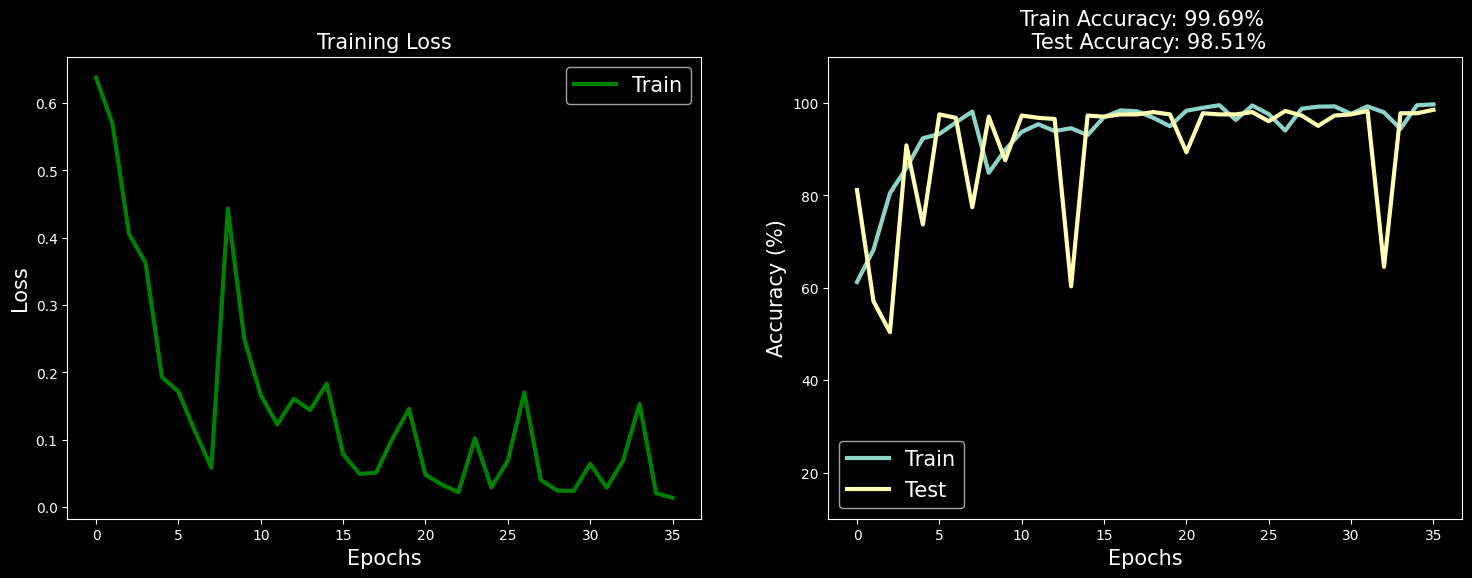

In [21]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(hist.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)


ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()